# <center>**Evolution of drug use in Europe EDA**</center>



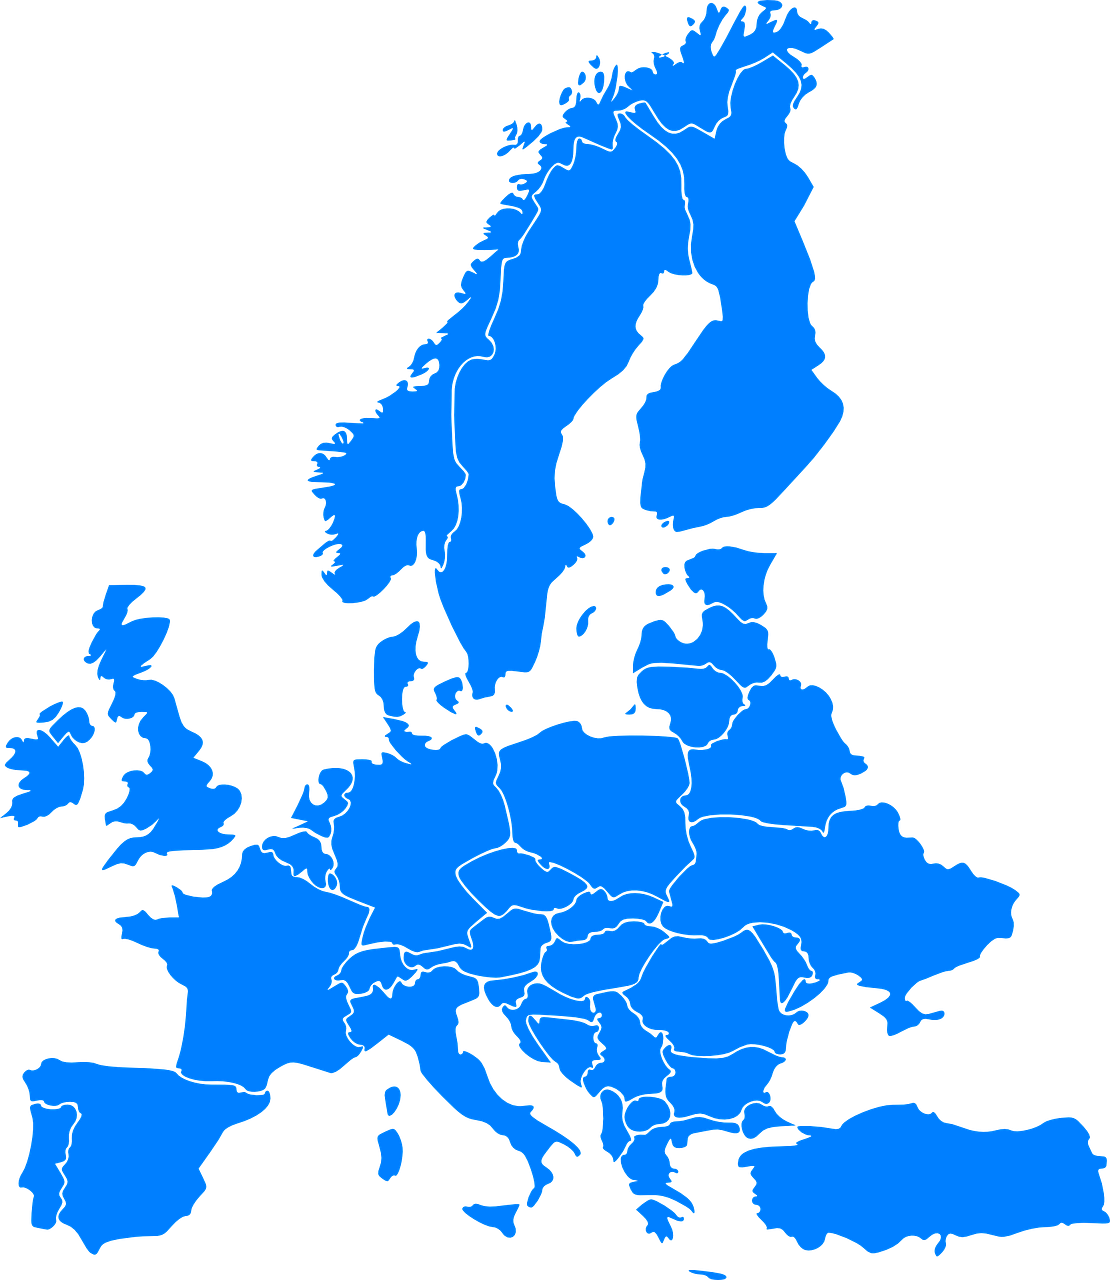

## Introduction

During the late twentieth century and the early twenty-first century, there has been increased awareness of drug use worldwide. This has led to various measures aimed at controlling the situation, including prevention strategies through educational campaigns, improved access to treatment and rehabilitation, stronger drug trafficking controls, and enhanced research and monitoring.

The question is: Have these measures been effective? To explore that, this EDA examines trends in drug use across different countries, specifically focusing on the twenty-first century in the European Union. The analysis also includes the participation of Norway and Turkey, based on surveys conducted by the European Union Drugs Agency (EUDA) on the prevalence and patterns of drug use in the general population with an age range of 15-64 (*https://www.euda.europa.eu/data/statistical-bulletin/archive_en*). The type of drugs surveyed were alcohol, tobacco, ,amphetamines, cannabis, cocaine, ecstasy and LSD. In addition, we will use the Eurostat source to obtain the Gini coefficient of the countries (*https://ec.europa.eu/eurostat/databrowser/view/tessi190/default/table?lang=en*). All this data could be found in [this link](EDA/Own_projet)

The following aspects will be analyzed in this EDA:

- Analysis of consumption trends across the selected countries
- Assessment of consumption by gender
- Maximum consumption values by country
- If there is an increase in the countries where it is legalized
- Evaluation of consumption by countries based on the Gini coefficient


The index is: 
* Introduction
* Import libraries
* Data Loading and Exploration | Cleaning
    - Data reading
    - Combine DFs and dealing with the missing values
* Descriptive Statistics and graphics
    - Divergence of the data
    - Trend of the data
* Descriptive analysis with the most current data
    - Assessment of consumption by gender
    - Maximum consumption values by country
    - Is there an increase in the countries where it is legalized?
    - Evaluation of consumption based on the Gini coefficient
    - Representation of values on a map of Europe
* Final conclusion

## Import libraries

We will use the following libraries
1. Pandas: Data manipulation and analysis
2. Numpy: Numerical operations and calculations
3. Matplotlib: Data visualization and plotting
4. Seaborn: Enhanced data visualization and statistical graphics
5. Geopandas: Working with geospatial data easier
6. highlight_text: Highlights specific text in Python.
7. warnings: Warns about issues in Python code

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from highlight_text import fig_text
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

Style used to plot:

In [283]:
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-colorblind')
#UE colors:
color_1='#004494' #blue
color_2='#ffd617' #yellow
color_3='#404040' #gray


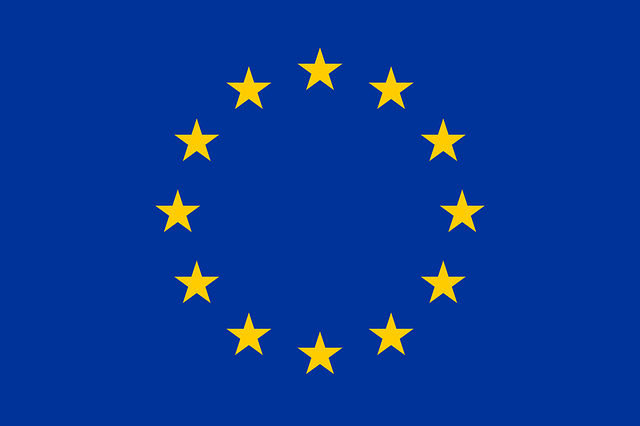

## Data Loading and Cleaning

We load some xlsx files downloaded from the source and then we select the necessary data. 
 
We have downloaded the datasets from the displayed years, which correspond to when the document was created and when it may have been updated with new surveys, if any were conducted. These selected years cover the entire spectrum of surveys carried out by the EUDA.

### Read of the data

In [284]:
#In all this data we replace 'Türkiye' with 'Turkey'

alc_2024=pd.read_excel('.\\Own_projet\\2024\\Alcohol.xlsx',skiprows=3).replace('Türkiye','Turkey')
amp_2024=pd.read_excel('.\\Own_projet\\2024\\Amphetamines.xlsx',skiprows=3).replace('Türkiye','Turkey')
can_2024=pd.read_excel('.\\Own_projet\\2024\\Cannabis.xlsx',skiprows=3).replace('Türkiye','Turkey')
coc_2024=pd.read_excel('.\\Own_projet\\2024\\Cocaine.xlsx',skiprows=3).replace('Türkiye','Turkey')
ect_2024=pd.read_excel('.\\Own_projet\\2024\\Ecstasy.xlsx',skiprows=3).replace('Türkiye','Turkey')
lsd_2024=pd.read_excel('.\\Own_projet\\2024\\LSD.xlsx',skiprows=3).replace('Türkiye','Turkey')
tob_2024=pd.read_excel('.\\Own_projet\\2024\\Tobacco.xlsx',skiprows=3).replace('Türkiye','Turkey')

alc_2024=alc_2024.iloc[0:int(alc_2024.index[alc_2024['Country']=='Turkey'][0]+1):1,::]
amp_2024=amp_2024.iloc[0:int(amp_2024.index[amp_2024['Country']=='Turkey'][0]+1):1,::]
can_2024=can_2024.iloc[0:int(can_2024.index[can_2024['Country']=='Turkey'][0]+1):1,::]
coc_2024=coc_2024.iloc[0:int(coc_2024.index[coc_2024['Country']=='Turkey'][0]+1):1,::]
ect_2024=ect_2024.iloc[0:int(ect_2024.index[ect_2024['Country']=='Turkey'][0]+1):1,::]
lsd_2024=lsd_2024.iloc[0:int(lsd_2024.index[lsd_2024['Country']=='Turkey'][0]+1):1,::]
tob_2024=tob_2024.iloc[0:int(tob_2024.index[tob_2024['Country']=='Turkey'][0]+1):1,::]


In [285]:
alc_2020=pd.read_excel('.\\Own_projet\\2020\\Alcohol.xlsx',skiprows=3)
amp_2020=pd.read_excel('.\\Own_projet\\2020\\Amphetamines.xlsx',skiprows=3)
can_2020=pd.read_excel('.\\Own_projet\\2020\\Cannabis.xlsx',skiprows=3)
coc_2020=pd.read_excel('.\\Own_projet\\2020\\Cocaine.xlsx',skiprows=3)
ect_2020=pd.read_excel('.\\Own_projet\\2020\\Ecstasy.xlsx',skiprows=3)
lsd_2020=pd.read_excel('.\\Own_projet\\2020\\LSD.xlsx',skiprows=3)
tob_2020=pd.read_excel('.\\Own_projet\\2020\\Tobacco.xlsx',skiprows=3)

 
alc_2020=alc_2020.iloc[0:int(alc_2020.index[alc_2020['Country']=='Turkey'][0]+1):1,::]
amp_2020=amp_2020.iloc[0:int(amp_2020.index[amp_2020['Country']=='Turkey'][0]+1):1,::]
can_2020=can_2020.iloc[0:int(can_2020.index[can_2020['Country']=='Turkey'][0]+1):1,::]
coc_2020=coc_2020.iloc[0:int(coc_2020.index[coc_2020['Country']=='Turkey'][0]+1):1,::]
ect_2020=ect_2020.iloc[0:int(ect_2020.index[ect_2020['Country']=='Turkey'][0]+1):1,::]
lsd_2020=lsd_2020.iloc[0:int(lsd_2020.index[lsd_2020['Country']=='Turkey'][0]+1):1,::]
tob_2020=tob_2020.iloc[0:int(tob_2020.index[tob_2020['Country']=='Turkey'][0]+1):1,::]



In [286]:
alc_2017=pd.read_excel('.\\Own_projet\\2017\\Alcohol.xlsx',skiprows=3)
amp_2017=pd.read_excel('.\\Own_projet\\2017\\Amphetamines.xlsx',skiprows=3)
can_2017=pd.read_excel('.\\Own_projet\\2017\\Cannabis.xlsx',skiprows=3)
coc_2017=pd.read_excel('.\\Own_projet\\2017\\Cocaine.xlsx',skiprows=3)
ect_2017=pd.read_excel('.\\Own_projet\\2017\\Ecstasy.xlsx',skiprows=3)
lsd_2017=pd.read_excel('.\\Own_projet\\2017\\LSD.xlsx',skiprows=3)
tob_2017=pd.read_excel('.\\Own_projet\\2017\\Tobacco.xlsx',skiprows=3)

alc_2017=alc_2017.iloc[0:int(alc_2017.index[alc_2017['Country']=='Turkey'][0]+1):1,::]
amp_2017=amp_2017.iloc[0:int(amp_2017.index[amp_2017['Country']=='Turkey'][0]+1):1,::]
can_2017=can_2017.iloc[0:int(can_2017.index[can_2017['Country']=='Turkey'][0]+1):1,::]
coc_2017=coc_2017.iloc[0:int(coc_2017.index[coc_2017['Country']=='Turkey'][0]+1):1,::]
ect_2017=ect_2017.iloc[0:int(ect_2017.index[ect_2017['Country']=='Turkey'][0]+1):1,::]
lsd_2017=lsd_2017.iloc[0:int(lsd_2017.index[lsd_2017['Country']=='Turkey'][0]+1):1,::]
tob_2017=tob_2017.iloc[0:int(tob_2017.index[tob_2017['Country']=='Turkey'][0]+1):1,::]



In [287]:
total_2013=pd.read_excel('.\\Own_projet\\2013\\Table2013.xlsx',skiprows=4)
total_2013=total_2013.iloc[0:int(total_2013.index[total_2013['Country']=='Norway'][0]+1):1,::]
total_2013.dropna(inplace=True,how='all')
total_2013.dropna(axis=1,inplace=True,thresh=total_2013.shape[0]*0.8)
total_2013=total_2013[total_2013['Country']!='United Kingdom']
total_2013.drop(columns=['Geographical area','Reference','Age range all adults'],inplace=True)
total_2013.loc[7,'Year']=2010 #It was 2010-2011


In [288]:
total_2010=pd.read_excel('.\\Own_projet\\2010\\Table2010.xlsx',skiprows=4)
total_2010=total_2010.iloc[0:int(total_2010.index[total_2010['Country']=='Norway'][0]+1):1,::]
total_2010.dropna(inplace=True,how='all')
total_2010.dropna(axis=1,inplace=True,thresh=total_2010.shape[0]*0.8)
total_2010=total_2010[total_2010['Country']!='United Kingdom']
total_2010.drop(columns=['Geographical area','Reference','Age range all adults'],inplace=True)
total_2010.loc[7,'Year']=2006 #It was 2006-2007
total_2010.loc[9,'Year']=2007 #It was 2007-2008
total_2010.drop(index=27,inplace=True)


This Excel file corresponds to the document with the Gini coefficients of each country, which we will use later:

In [289]:
df_gini=pd.read_excel('.\\Own_projet\\GINI.xlsx',sheet_name='Sheet 1',skiprows=8).replace('Türkiye','Turkey').replace(':',np.nan).replace('Czechia','Czech Republic')

### Combine DFs and dealing with the missing values

Now we transform the dataframes getting a dataframe by substance, where the rows are countries and columns years

We combine the dataframes we have from different years, remove rows with duplicate countries (Czech Republic and Czechia), and drop columns and rows filled with NaN due to missing data. 

#### ALCOHOL

In [290]:
alc_2024_mod=alc_2024.pivot(index="Country", columns="Year", values="Total")
alc_2020_mod=alc_2020.pivot(index="Country", columns="Year", values="Total")
alc_2017_mod=alc_2017.pivot(index="Country", columns="Year", values="Total")

df_alcohol=alc_2024_mod.combine_first(alc_2020_mod.combine_first(alc_2017_mod)).dropna(axis=1, how='all').drop(index='Czechia').dropna(axis=0, how='all')

#### TOBACCO

In [291]:
tob_2024_mod=tob_2024.pivot(index="Country", columns="Year", values="Total")
tob_2020_mod=tob_2020.pivot(index="Country", columns="Year", values="Total")
tob_2017_mod=tob_2017.pivot(index="Country", columns="Year", values="Total")

df_tobacco=tob_2024_mod.combine_first(tob_2020_mod.combine_first(tob_2017_mod)).dropna(axis=1, how='all').drop(index='Czechia').dropna(axis=0, how='all')


#### AMPHETAMINES

In [292]:
amp_2024_mod=amp_2024.pivot(index="Country", columns="Year", values="Total")
amp_2020_mod=amp_2020.pivot(index="Country", columns="Year", values="Total")
amp_2017_mod=amp_2017.pivot(index="Country", columns="Year", values="Total")
amp_2013_mod=total_2013.loc[:,['Country','Year','Amphetamines (%) (2)']].pivot(index="Country", columns="Year", values="Amphetamines (%) (2)")
amp_2010_mod=total_2010.loc[:,['Country','Year','Amphetamines (%) (2)']].pivot(index="Country", columns="Year", values="Amphetamines (%) (2)")

df_amphetamines=amp_2024_mod.combine_first(amp_2020_mod.combine_first(amp_2017_mod.combine_first(amp_2013_mod.combine_first(amp_2010_mod)))).dropna(axis=1, how='all').drop(columns=[':'])
df_amphetamines.replace(':',np.nan,inplace=True)
df_amphetamines.loc['Czech Republic',2018:2023]=df_amphetamines.loc['Czechia',2018:2023]
df_amphetamines=df_amphetamines.drop(index='Czechia').dropna(axis=0, how='all')


#### CANNABIS

In [293]:
can_2024_mod=can_2024.pivot(index="Country", columns="Year", values="Total")
can_2020_mod=can_2020.pivot(index="Country", columns="Year", values="Total")
can_2017_mod=can_2017.pivot(index="Country", columns="Year", values="Total")
can_2013_mod=total_2013.loc[:,['Country','Year','Cannabis (%)']].pivot(index="Country", columns="Year", values="Cannabis (%)")
can_2010_mod=total_2010.loc[:,['Country','Year','Cannabis (%)']].pivot(index="Country", columns="Year", values="Cannabis (%)")

df_cannabis=can_2024_mod.combine_first(can_2020_mod.combine_first(can_2017_mod.combine_first(can_2013_mod.combine_first(can_2010_mod)))).dropna(axis=1, how='all').drop(columns=[':']).dropna(axis=0, how='all')
df_cannabis.replace(':',np.nan,inplace=True)

#I use convert_dtypes() to convert all values to float, as having both int and float causes an error later when using them (the other tables already have all values as float)
df_cannabis=df_cannabis.convert_dtypes()
df_cannabis.loc['Czech Republic',2018:2023]=df_cannabis.loc['Czechia',2018:2023]
df_cannabis=df_cannabis.drop(index='Czechia')

#### COCAINE

In [294]:
coc_2024_mod=coc_2024.pivot(index="Country", columns="Year", values="Total")
coc_2020_mod=coc_2020.pivot(index="Country", columns="Year", values="Total")
coc_2017_mod=coc_2017.pivot(index="Country", columns="Year", values="Total")
coc_2013_mod=total_2013.loc[:,['Country','Year','Cocaine (%) (1)']].pivot(index="Country", columns="Year", values="Cocaine (%) (1)")
coc_2010_mod=total_2010.loc[:,['Country','Year','Cocaine (%) (1)']].pivot(index="Country", columns="Year", values="Cocaine (%) (1)")

df_cocaine=coc_2024_mod.combine_first(coc_2020_mod.combine_first(coc_2017_mod.combine_first(coc_2013_mod.combine_first(coc_2010_mod)))).dropna(axis=1, how='all').drop(columns=[':']).dropna(axis=0, how='all')
df_cocaine.replace(':',np.nan,inplace=True)
df_cocaine.loc['Czech Republic',2018:2023]=df_cocaine.loc['Czechia',2018:2023]
df_cocaine=df_cocaine.drop(index='Czechia')


#### ECSTASY

In [295]:
ect_2024_mod=ect_2024.pivot(index="Country", columns="Year", values="Total")
ect_2020_mod=ect_2020.pivot(index="Country", columns="Year", values="Total")
ect_2017_mod=ect_2017.pivot(index="Country", columns="Year", values="Total")
ect_2013_mod=total_2013.loc[:,['Country','Year','Ecstasy (%) (3)']].pivot(index="Country", columns="Year", values="Ecstasy (%) (3)")
ect_2010_mod=total_2010.loc[:,['Country','Year','Ecstasy (%) (3)']].pivot(index="Country", columns="Year", values="Ecstasy (%) (3)")

df_ecstasy=ect_2024_mod.combine_first(ect_2020_mod.combine_first(ect_2017_mod.combine_first(ect_2013_mod.combine_first(ect_2010_mod)))).dropna(axis=1, how='all').drop(columns=[':']).dropna(axis=0, how='all')
df_ecstasy.replace(':',np.nan,inplace=True)
df_ecstasy.loc['Czech Republic',2018:2023]=df_ecstasy.loc['Czechia',2018:2023]
df_ecstasy=df_ecstasy.drop(index='Czechia')


#### LSD

In [296]:
lsd_2024_mod=lsd_2024.pivot(index="Country", columns="Year", values="Total")
lsd_2020_mod=lsd_2020.pivot(index="Country", columns="Year", values="Total")
lsd_2017_mod=lsd_2017.pivot(index="Country", columns="Year", values="Total")
lsd_2013_mod=total_2013.loc[:,['Country','Year','LSD (%)']].pivot(index="Country", columns="Year", values="LSD (%)")
lsd_2010_mod=total_2010.loc[:,['Country','Year','LSD (%)']].pivot(index="Country", columns="Year", values="LSD (%)")

df_lsd=lsd_2024_mod.combine_first(lsd_2020_mod.combine_first(lsd_2017_mod.combine_first(lsd_2013_mod.combine_first(lsd_2010_mod)))).dropna(axis=1, how='all').drop(columns=[':'])
df_lsd.replace(':',np.nan,inplace=True)
df_lsd.loc['Czech Republic',2018:2023]=df_lsd.loc['Czechia',2018:2023]
df_lsd=df_lsd.drop(index='Czechia').dropna(axis=0, how='all')


## Descriptive Statistics and graphics

In this section, the analyses conducted with the current data will be shown, including both its dispersion and the trend observed.

### Descriptive Statistics

In [297]:
df_alcohol.describe()
df_alcohol.info()
df_tobacco.describe()
df_tobacco.info()
df_amphetamines.describe()
df_amphetamines.info()
df_cannabis.describe()
df_cannabis.info()
df_cocaine.describe()
df_cocaine.info()
df_ecstasy.describe()
df_ecstasy.info()
df_lsd.describe()
df_lsd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Austria to Turkey
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2008.0  2 non-null      float64
 1   2009.0  1 non-null      float64
 2   2011.0  1 non-null      float64
 3   2012.0  5 non-null      float64
 4   2013.0  3 non-null      float64
 5   2014.0  3 non-null      float64
 6   2015.0  10 non-null     float64
 7   2016.0  5 non-null      float64
 8   2017.0  4 non-null      float64
 9   2018.0  6 non-null      float64
 10  2019.0  6 non-null      float64
 11  2020.0  3 non-null      float64
 12  2021.0  3 non-null      float64
 13  2022.0  6 non-null      float64
 14  2023.0  1 non-null      float64
dtypes: float64(15)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Austria to Turkey
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2008.0  2 non-null      float64
 1

##### Analysis:

What stands out the most is the amount of missing values, so we will need to be cautious when working with them.

### Divergence of the data

First of all, let's look at the divergence of the data to see if we can use it as is or if we should make changes. To do this we will use the violin plots that allow us to see the distribution of the points.

In [298]:
""" 
Let's store all the values from the dataframes in arrays, removing the NaN values, so that we can represent them later
"""

all_data_alcohol=np.array(df_alcohol.values.flatten())
all_data_tobacco=np.array(df_tobacco.values.flatten())
all_data_amphetamines=np.array(df_amphetamines.values.flatten())
all_data_cannabis=pd.array(df_cannabis.values.flatten())
all_data_cocaine=np.array(df_cocaine.values.flatten())
all_data_ecstasy=np.array(df_ecstasy.values.flatten())
all_data_lsd=np.array(df_lsd.values.flatten())

all_data_alcohol=all_data_alcohol[~np.isnan(all_data_alcohol)]
all_data_tobacco=all_data_tobacco[~np.isnan(all_data_tobacco)]
all_data_amphetamines=all_data_amphetamines[~np.isnan(all_data_amphetamines)]
all_data_cannabis=all_data_cannabis.dropna()
all_data_cocaine=all_data_cocaine[~np.isnan(all_data_cocaine)]
all_data_ecstasy=all_data_ecstasy[~np.isnan(all_data_ecstasy)]
all_data_lsd=all_data_lsd[~np.isnan(all_data_lsd)]



In [299]:
all_data=[all_data_alcohol,all_data_tobacco,all_data_amphetamines,all_data_cannabis,all_data_cannabis,all_data_cocaine,all_data_ecstasy,all_data_lsd]
all_data_title=['all_data_alcohol','all_data_tobacco','all_data_amphetamines','all_data_cannabis','all_data_cocaine','all_data_ecstasy','all_data_LSD']

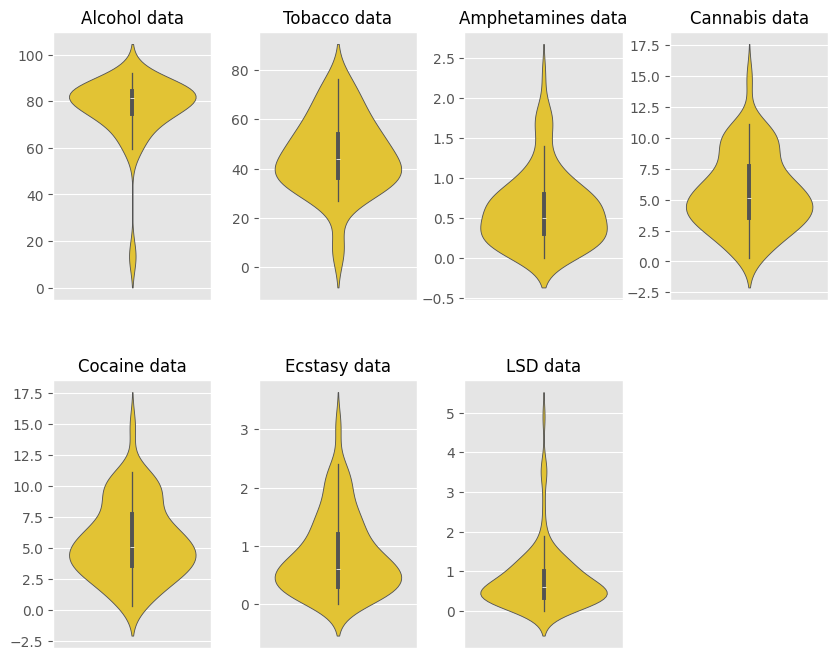

In [300]:
plt.figure(figsize=(10,8))
title_data=['Alcohol data','Tobacco data','Amphetamines data','Cannabis data','Cocaine data','Ecstasy data','LSD data']
for i in range(7):
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.subplot(2,4,i+1)
    sns.violinplot(all_data[i],color=color_2);
    #sns.swarmplot(data=all_data[i], color="black");
    plt.xticks([])
    plt.title(title_data[i],fontsize=12)



##### `ANALYSIS:`

In general, the data is not very dispersed, except for tobacco, alcohol and LSD. In this EDA, it has been decided to use all the data without removing the outliers to consider all possible cases within the general population.  

However, we will also observe what happens in the case of alcohol when its outlier, Turkey, is removed, since it is an Arab country where alcohol consumption is low, it may not reflect the European reality very well. In the other cases, the outliers represent a reality that can be found, and there is no reason to remove them.

### Trend of the data

We now study the correlation between the data for each country and the years to study the trend. 

In this case we are going to use the covariance that indicates the degree of joint variation of two random variables with respect to their means in a more quantified way than the correlation would give us.

On the other hand, all the points are plotted to see a more global trend. However, here we can encounter `Simpson's paradox`, which could have led us to an erroneous analysis. Simpson's paradox is a phenomenon in probability and statistics in which a trend appears in several groups of data but disappears or reverses when the groups are combined. In some cases, the mean of the covariance shows a trend different from when we plots all the points without distinguishing by country. 

##### *Summarizing...*
we will not use the global data since they give us a “falsified” information of the trend, we will use the data obtained for the covariance of each country. It is only left to show this curious casuistry of Simpson's paradox.

#### ALCOHOL

In [301]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""

a_alcohol=np.zeros(len(df_alcohol.index))
for i,j in enumerate(df_alcohol.index):
    years=df_alcohol.columns[~np.isnan(df_alcohol.loc[j])]
    a=df_alcohol.loc[j,years]
    a_alcohol[i]=(np.cov(np.array(a.index),a.values)[0][1])


mean_corr_alcohol=a_alcohol[~np.isnan(a_alcohol)].mean()
print(mean_corr_alcohol)
print(a_alcohol)



-4.380952380952378
[-15.5                 nan   0.          20.2          3.9
          nan   1.5         -0.4                 nan  -3.15
          nan  -7.6         -4.4          5.13333333 -18.5
   5.66666667          nan          nan -24.5         -2.76666667
          nan   6.96666667  -7.35       -35.2         -1.2
  -1.2         -8.8         -4.8       ]


##### Global analysis (Not used due to Simpson's paradox)

In [302]:
#The value for Turkey is not used because it is too significant an outlier in the alcohol consumption rate for the calculation of the global trend
list_years_alcohol=list()
list_values_alcohol=list()
for i in df_alcohol.columns:
    for j in df_alcohol.loc[:'Sweden',i][~np.isnan(df_alcohol.loc[:,i])]:
            list_years_alcohol.append(i)
            list_values_alcohol.append(j)


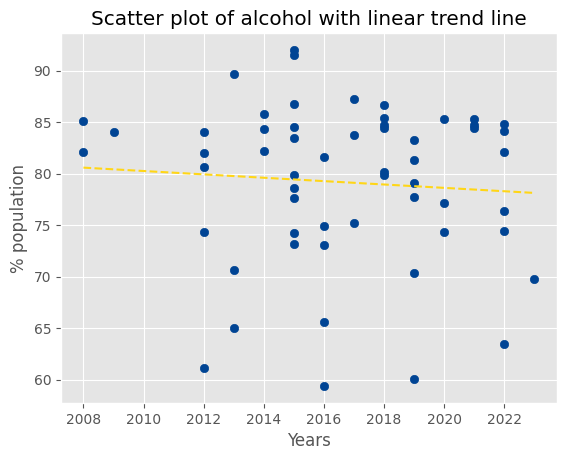

poly1d([-1.63576251e-01,  4.09040340e+02])

In [303]:
trend_line_alcohol=np.polyfit(list_years_alcohol,list_values_alcohol,1)
p_alcohol=np.poly1d(trend_line_alcohol)

plt.scatter(list_years_alcohol,list_values_alcohol,color=color_1)
plt.plot(list_years_alcohol,p_alcohol(list_years_alcohol), 'r--',color=color_2)

plt.title("Scatter plot of alcohol with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_alcohol

#### TOBACCO

In [304]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""

a_tobacco=np.zeros(len(df_tobacco.index))
for i,j in enumerate(df_tobacco.index):
    years=df_tobacco.columns[~np.isnan(df_tobacco.loc[j])]
    a=df_tobacco.loc[j,years]
    a_tobacco[i]=(np.cov(np.array(a.index),a.values)[0][1])


mean_corr_tobacco=a_tobacco[~np.isnan(a_tobacco)].mean()
print(mean_corr_tobacco)
print(a_tobacco)

52.50416666666667
[88.5                nan 34.4        42.         62.1                nan
 87.5                nan         nan 23.55               nan         nan
 22.2        69.66666667 94.25       67.56666667         nan         nan
         nan 59.63333333 33.15       66.4        58.45       -5.
 35.7       ]


##### Global analysis (Not used due to Simpson's paradox):

In [305]:
list_years_tobacco=list()
list_values_tobacco=list()
for i in df_tobacco.columns:
    for j in df_tobacco.loc[:,i][~np.isnan(df_tobacco.loc[:,i])]:
            list_years_tobacco.append(i)
            list_values_tobacco.append(j)


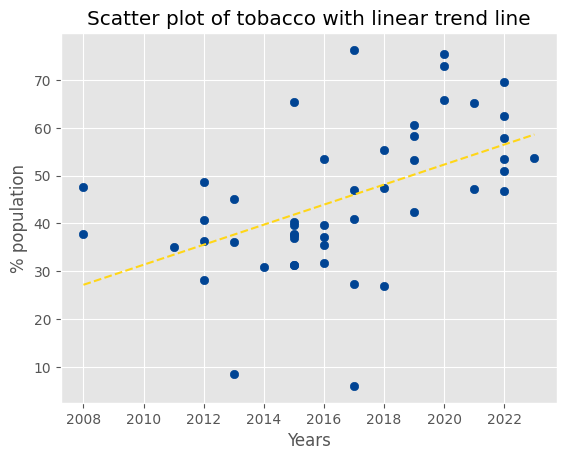

poly1d([ 2.09615779e+00, -4.18192654e+03])

In [306]:
trend_line_tobacco=np.polyfit(list_years_tobacco,list_values_tobacco,1)
p_tobacco=np.poly1d(trend_line_tobacco)

plt.scatter(list_years_tobacco,list_values_tobacco,color=color_1)
plt.plot(list_years_tobacco,p_tobacco(list_years_tobacco), 'r--',color=color_2)

plt.title("Scatter plot of tobacco with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_tobacco

#### AMPHETAMINES

In [307]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""

a_amphetamines=np.zeros(len(df_amphetamines.index))

for i,j in enumerate(df_amphetamines.index):
    years=df_amphetamines.columns[~np.isnan(df_amphetamines.loc[j])]
    a=df_amphetamines.loc[j,years]
    a_amphetamines[i]=np.cov(list(a.index),np.array(a.values))[0][1]


mean_corr_amphetamines=a_amphetamines[~np.isnan(a_amphetamines)].mean()
print(mean_corr_amphetamines)
print(a_amphetamines)


0.29705128205128206
[ 1.4         0.75       -0.33333333  1.8         0.4        -1.75
 -0.965      -1.          4.3         0.46833333  2.265              nan
 -0.26666667  1.21666667  0.6        -0.575      -0.98333333  0.
         nan  4.295      -1.765      -0.93333333 -0.46666667  0.2
 -0.37333333  0.3        -0.635      -0.225     ]


##### Global analysis (Not used due to Simpson's paradox):

In [308]:
list_years_amphetamines=list()
list_values_amphetamines=list()
for i in df_amphetamines.columns:
    for j in df_amphetamines.loc[:,i][~np.isnan(df_amphetamines.loc[:,i])]:
            list_years_amphetamines.append(i)
            list_values_amphetamines.append(j)

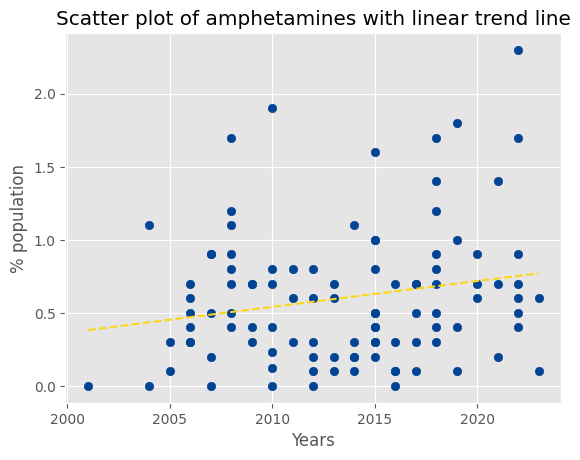

poly1d([ 1.76914422e-02, -3.50184610e+01])

In [309]:
trend_line_amphetamines=np.polyfit(list_years_amphetamines,list_values_amphetamines,1)
p_amphetamines=np.poly1d(trend_line_amphetamines)

plt.scatter(list_years_amphetamines,list_values_amphetamines,color=color_1)
plt.plot(list_years_amphetamines,p_amphetamines(list_years_amphetamines), 'r--',color=color_2)

plt.title("Scatter plot of amphetamines with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_amphetamines

#### CANNABIS

In [310]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""
a_cannabis=np.zeros(len(df_cannabis.index))
for i,j in enumerate(df_cannabis.index):
    years=df_cannabis.columns[~np.isnan(df_cannabis.loc[j])]
    a=df_cannabis.loc[j,years]
    a_cannabis[i]=np.cov(list(a.index),np.array(a.values))[0][1]


mean_corr_cannabis=a_cannabis[~np.isnan(a_cannabis)].mean()
print(mean_corr_cannabis)
print(a_cannabis)

3.3913563218390803
[ 8.9         4.44166667 -0.13333333  9.05        8.20833333 -7.825
  2.735       3.         14.4         6.471      10.2         6.05
 -3.2         3.15       -1.15       -1.98333333 -2.14166667  1.25
  0.6        13.32        3.55       -1.13333333 -0.51666667  6.825
 -2.235       7.71666667  1.87        4.53        2.4       ]


##### Global analysis (Not used due to Simpson's paradox):

In [311]:
list_years_cannabis=list()
list_values_cannabis=list()
for i in df_cannabis.columns:
    for j in df_cannabis.loc[:,i][~np.isnan(df_cannabis.loc[:,i])]:
            list_years_cannabis.append(i)
            list_values_cannabis.append(j)

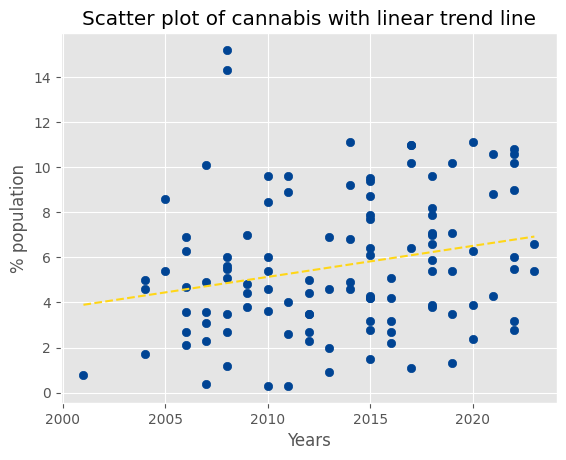

poly1d([ 1.37508698e-01, -2.71256717e+02])

In [312]:
trend_line_cannabis=np.polyfit(list_years_cannabis,list_values_cannabis,1)
p_cannabis=np.poly1d(trend_line_cannabis)

plt.scatter(list_years_cannabis,list_values_cannabis,color=color_1)
plt.plot(list_years_cannabis,p_cannabis(list_years_cannabis), 'r--',color=color_2)

plt.title("Scatter plot of cannabis with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_cannabis

#### COCAINE

In [313]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""

a_cocaine=np.zeros(len(df_cocaine.index))
for i,j in enumerate(df_cocaine.index):
    years=df_cocaine.columns[~np.isnan(df_cocaine.loc[j])]
    a=df_cocaine.loc[j,years]
    a_cocaine[i]=np.cov(list(a.index),np.array(a.values))[0][1]


mean_corr_cocaine=a_cocaine[~np.isnan(a_cocaine)].mean()
print(mean_corr_cocaine)
print(a_cocaine)

1.1858641975308641
[ 2.1         1.25       -0.13333333  2.33333333 -0.925      -0.265
  2.355       1.5         2.9         2.11        2.085       1.65
  0.33333333  1.3        -0.71        2.025       0.84166667  0.25
         nan  6.06        3.7        -0.13333333 -0.96666667  0.825
 -0.1         0.9        -1.4         2.13333333         nan]


##### Global analysis (Not used due to Simpson's paradox):

In [314]:
list_years_cocaine=list()
list_values_cocaine=list()
for i in df_cocaine.columns:
    for j in df_cocaine.loc[:,i][~np.isnan(df_cocaine.loc[:,i])]:
            list_years_cocaine.append(i)
            list_values_cocaine.append(j)

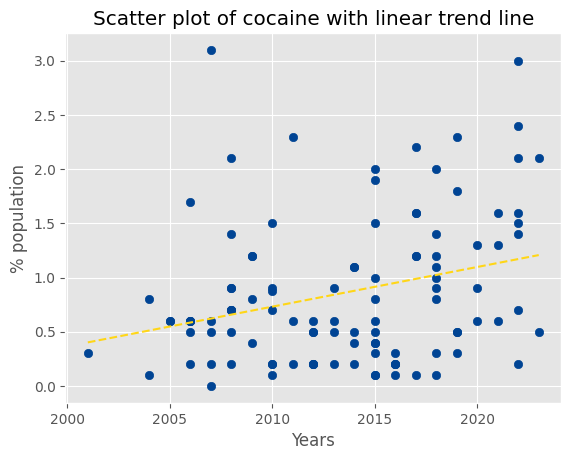

poly1d([ 3.66089152e-02, -7.28527127e+01])

In [315]:
trend_line_cocaine=np.polyfit(list_years_cocaine,list_values_cocaine,1)
p_cocaine=np.poly1d(trend_line_cocaine)

plt.scatter(list_years_cocaine,list_values_cocaine,color=color_1)
plt.plot(list_years_cocaine,p_cocaine(list_years_cocaine), 'r--',color=color_2)

plt.title("Scatter plot of cocaine with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_cocaine

#### ECSTASY

In [316]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""

a_ecstasy=np.zeros(len(df_ecstasy.index))
for i,j in enumerate(df_ecstasy.index):
    years=df_ecstasy.columns[~np.isnan(df_ecstasy.loc[j])]
    a=df_ecstasy.loc[j,years]
    a_ecstasy[i]=np.cov(list(a.index),np.array(a.values))[0][1]


mean_corr_ecstasy=a_ecstasy[~np.isnan(a_ecstasy)].mean()
print(mean_corr_ecstasy)
print(a_ecstasy)

0.7046913580246913
[ 1.75        2.25       -0.93333333  1.43333333 -0.55       -3.615
  0.675      -1.          2.6         0.87333333  1.875       0.
  0.53333333  4.58333333  0.505      -1.675      -1.1         0.25
         nan 10.42        0.695      -0.73333333 -0.875       0.525
 -1.07        0.6        -0.815       1.825              nan]


##### Global analysis (Not used due to Simpson's paradox):

In [317]:
list_years_ecstasy=list()
list_values_ecstasy=list()
for i in df_ecstasy.columns:
    for j in df_ecstasy.loc[:,i][~np.isnan(df_ecstasy.loc[:,i])]:
            list_years_ecstasy.append(i)
            list_values_ecstasy.append(j)

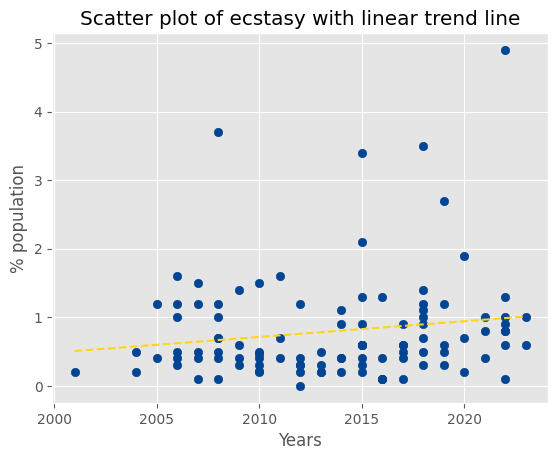

poly1d([ 2.28668108e-02, -4.52477701e+01])

In [318]:
trend_line_ecstasy=np.polyfit(list_years_ecstasy,list_values_ecstasy,1)
p_ecstasy=np.poly1d(trend_line_ecstasy)

plt.scatter(list_years_ecstasy,list_values_ecstasy,color=color_1)
plt.plot(list_years_ecstasy,p_ecstasy(list_years_ecstasy), 'r--',color=color_2)

plt.title("Scatter plot of ecstasy with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_ecstasy

#### LSD

In [319]:
"""  
To obtain the covariance I have to create two arrays, one with the years and another one with the corresponding values in each iteration (by country)
"""

a_lsd=np.zeros(len(df_lsd.index))
for i,j in enumerate(df_lsd.index):
    years=df_lsd.columns[~np.isnan(df_lsd.loc[j])]
    a=df_lsd.loc[j,years]
    a_lsd[i]=np.cov(list(a.index),np.array(a.values))[0][1]


mean_corr_lsd=a_lsd[~np.isnan(a_lsd)].mean()
print(mean_corr_lsd)
print(a_lsd)

4.033680555555556
[ 5.25               nan  0.46666667  2.03333333  2.55       -0.46
  6.01        8.          8.          4.90333333  6.21        2.2
  1.86666667 11.91666667  3.45        4.48333333  1.89166667  3.5
         nan  4.545       5.535       1.4         0.64166667  0.975
  5.14        6.3                nan]


##### Global analysis (Not used due to Simpson's paradox):

In [320]:
list_years_lsd=list()
list_values_lsd=list()
for i in df_lsd.columns:
    for j in df_lsd.loc[:,i][~np.isnan(df_lsd.loc[:,i])]:
            list_years_lsd.append(i)
            list_values_lsd.append(j)

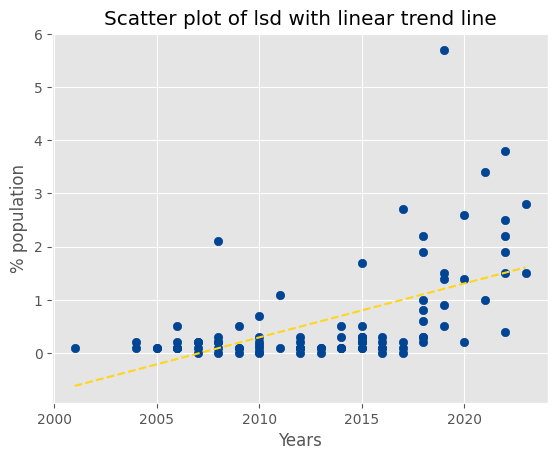

poly1d([ 1.01370953e-01, -2.03461853e+02])

In [321]:
trend_line_lsd=np.polyfit(list_years_lsd,list_values_lsd,1)
p_lsd=np.poly1d(trend_line_lsd)

plt.scatter(list_years_lsd,list_values_lsd,color=color_1)
plt.plot(list_years_lsd,p_lsd(list_years_lsd), 'r--',color=color_2)

plt.title("Scatter plot of lsd with linear trend line")
plt.xlabel("Years")
plt.ylabel("% population")
plt.show()
p_lsd

##### `ANALYSIS:`

Without focusing on the overall results, by observing the covariance data from each country, it can be seen that there is considerable divergence depending on the country and the drug. This will be clearer in the final section, where they will be represented on a map of Europe.

## Descriptive analysis and graphics with the most updated data


In this section, the analyses conducted with the most updated data will be shown, nalyzing different factors such as gender, consumption levels by country or the Gini coefficient.


### Assessment of consumption by gender

First, we calculate the percentage of females who consume compared to males, using the most up-to-date dataset available (2024)

#### ALCOHOL

In [322]:
porc_females_alc=(np.nanmean(alc_2024['Females'])-np.nanmean(alc_2024['Males']))/np.nanmean(alc_2024['Males'])*100
porc_females_alc


np.float64(-11.598197488734302)

#### TOBACCO

In [323]:
porc_females_tob=(np.nanmean(tob_2024['Females'])-np.nanmean(tob_2024['Males']))/np.nanmean(tob_2024['Males'])*100
porc_females_tob

np.float64(-21.863203020026877)

#### AMPHETAMINES

In [324]:
porc_females_amp=(np.nanmean(amp_2024['Females'])-np.nanmean(amp_2024['Males']))/np.nanmean(amp_2024['Males'])*100
porc_females_amp

np.float64(-54.263565891472865)

#### CANNABIS

In [325]:
porc_females_can=(np.nanmean(can_2024['Females'])-np.nanmean(can_2024['Males']))/np.nanmean(can_2024['Males'])*100
porc_females_can

np.float64(-52.3524379811805)

#### COCAINE

In [326]:
porc_females_coc=(np.nanmean(coc_2024['Females'])-np.nanmean(coc_2024['Males']))/np.nanmean(coc_2024['Males'])*100
porc_females_coc

np.float64(-56.864623243933586)

#### ECSTASY

In [327]:
porc_females_ect=(np.nanmean(ect_2024['Females'])-np.nanmean(ect_2024['Males']))/np.nanmean(ect_2024['Males'])*100
porc_females_ect

np.float64(-52.757201646090536)

#### LSD

In [328]:
porc_females_lsd=(np.nanmean(lsd_2024['Females'])-np.nanmean(lsd_2024['Males']))/np.nanmean(lsd_2024['Males'])*100
porc_females_lsd

np.float64(-61.43146181082449)

In [329]:
df_use_female_male=pd.DataFrame({'Drugs':['Alcohol','Tobacco','Amphetamines','Cannabis','Cocaine','Ecstasy','LSD'],'Porcentage (%)':[porc_females_alc,porc_females_tob,porc_females_amp,porc_females_can,porc_females_coc,porc_females_ect,porc_females_lsd]})
df_use_female_male['Porcentage (%)']=round(df_use_female_male['Porcentage (%)'],2)
df_use_female_male

,Drugs,Porcentage (%)
0,Alcohol,-11.60
1,Tobacco,-21.86
2,Amphetamines,-54.26
3,Cannabis,-52.35
4,Cocaine,-56.86
5,Ecstasy,-52.76
6,LSD,-61.43


To display the results, different pie charts will be created to show the percentage of men and women, with the total value set to 100.

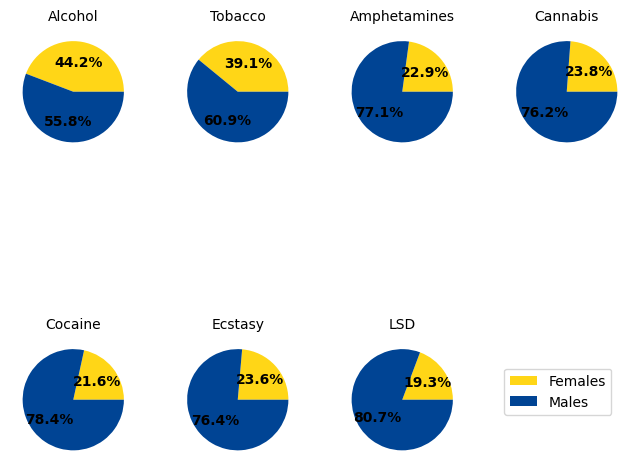

In [397]:
plt.figure(figsize=(8,8))
for i in range(len(df_use_female_male)):
    plt.subplots_adjust(wspace=0.3, hspace=0)
    plt.subplot(2,4,i+1)
    plt.pie(x=[100+df_use_female_male.iloc[i].loc['Porcentage (%)'],100-df_use_female_male.iloc[i].loc['Porcentage (%)']],autopct="%1.1f%%",colors=[color_2,color_1],textprops={'fontsize': 10,'color':'black','fontweight':'bold'});
    plt.title(df_use_female_male.iloc[i].loc['Drugs'],fontsize=10)
plt.legend(['Females','Males'],loc='best', bbox_to_anchor=(1.25, 0.3, 0.5, 0.5))

##### `ANALYSIS:`

In all cases, there is a higher consumption by males compared to females, with the difference being more than 75% in the case of drugs commonly known as hard drugs and cannabis

### Maximum consumption values by country

Prepare the most up-to-date tables where we will keep the most up to date values for each country, As this will depend on when the last survey was conducted in each country.  

#### Preparing the dataframes

a_act_X will be the dataframe with the most up to date values

In [331]:
years_act_alcohol=list()
values_act_alcohol=list()
for i in df_alcohol.index:
    for j in df_alcohol.columns[::-1]:
        if not pd.isna(df_alcohol.loc[i,j]):
            years_act_alcohol.append(j)
            values_act_alcohol.append(df_alcohol.loc[i,j])
            break
#Denmark has Nan in all its values.
a_act_alcohol=pd.DataFrame({'years_act_alcohol':years_act_alcohol,'values_act_alcohol':values_act_alcohol},index=df_alcohol.index)

In [332]:
years_act_tobacco=list()
values_act_tobacco=list()
for i in df_tobacco.index:
    for j in df_tobacco.columns[::-1]:
        if not pd.isna(df_tobacco.loc[i,j]):
            years_act_tobacco.append(j)
            values_act_tobacco.append(df_tobacco.loc[i,j])
            break
#Denmark has Nan in all its values.
a_act_tobacco=pd.DataFrame({'years_act_tobacco':years_act_tobacco,'values_act_tobacco':values_act_tobacco},index=df_tobacco.index)

In [333]:
years_act_amphetamines=list()
values_act_amphetamines=list()
for i in df_amphetamines.index:
    for j in df_amphetamines.columns[::-1]:
        if not pd.isna(df_amphetamines.loc[i,j]):
            years_act_amphetamines.append(j)
            values_act_amphetamines.append(df_amphetamines.loc[i,j])
            break

a_act_amphetamines=pd.DataFrame({'years_act_amphetamines':years_act_amphetamines,'values_act_amphetamines':values_act_amphetamines},index=df_amphetamines.index)

In [334]:
years_act_cannabis=list()
values_act_cannabis=list()
for i in df_cannabis.index:
    for j in df_cannabis.columns[::-1]:
        if not pd.isna(df_cannabis.loc[i,j]):
            years_act_cannabis.append(j)
            values_act_cannabis.append(df_cannabis.loc[i,j])
            break

a_act_cannabis=pd.DataFrame({'years_act_cannabis':years_act_cannabis,'values_act_cannabis':values_act_cannabis},index=df_cannabis.index)

In [335]:
years_act_cocaine=list()
values_act_cocaine=list()
for i in df_cocaine.index:
    for j in df_cocaine.columns[::-1]:
        if not pd.isna(df_cocaine.loc[i,j]):
            years_act_cocaine.append(j)
            values_act_cocaine.append(df_cocaine.loc[i,j])
            break

a_act_cocaine=pd.DataFrame({'years_act_cocaine':years_act_cocaine,'values_act_cocaine':values_act_cocaine},index=df_cocaine.index)

In [336]:
years_act_ecstasy=list()
values_act_ecstasy=list()
for i in df_ecstasy.index:
    for j in df_ecstasy.columns[::-1]:
        if not pd.isna(df_ecstasy.loc[i,j]):
            years_act_ecstasy.append(j)
            values_act_ecstasy.append(df_ecstasy.loc[i,j])
            break

a_act_ecstasy=pd.DataFrame({'years_act_ecstasy':years_act_ecstasy,'values_act_ecstasy':values_act_ecstasy},index=df_ecstasy.index)

In [337]:
years_act_lsd=list()
values_act_lsd=list()
for i in df_lsd.index:
    for j in df_lsd.columns[::-1]:
        if not pd.isna(df_lsd.loc[i,j]):
            years_act_lsd.append(j)
            values_act_lsd.append(df_lsd.loc[i,j])
            break

a_act_lsd=pd.DataFrame({'years_act_lsd':years_act_lsd,'values_act_lsd':values_act_lsd},index=df_lsd.index)

####  Maximum consumption values by country

Text(0, 0.5, '')

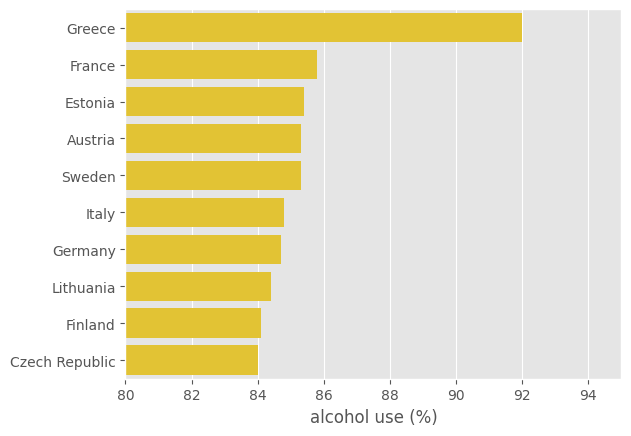

In [338]:
barplot_alcohol=sns.barplot(y=a_act_alcohol['values_act_alcohol'].sort_values(ascending=False).head(10).index,x=a_act_alcohol['values_act_alcohol'].sort_values(ascending=False).head(10),color=color_2)
plt.xlim(80,95)
plt.xlabel('alcohol use (%)')
plt.ylabel('')


In [339]:
print('The country with the most alcohol consumption is',a_act_alcohol['values_act_alcohol'].idxmax())
print('The country with the least alcohol consumption is',a_act_alcohol['values_act_alcohol'].idxmin())

The country with the most alcohol consumption is Greece
The country with the least alcohol consumption is Turkey


Text(0, 0.5, '')

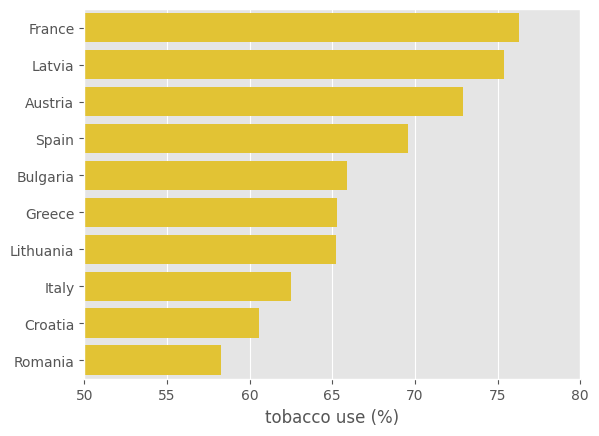

In [340]:
barplot_tobacco=sns.barplot(y=a_act_tobacco['values_act_tobacco'].sort_values(ascending=False).head(10).index,x=a_act_tobacco['values_act_tobacco'].sort_values(ascending=False).head(10),color=color_2)
plt.xlim(50,80)
plt.xlabel('tobacco use (%)')
plt.ylabel('')

In [341]:
print('The country with the most tobacco consumption is',a_act_tobacco['values_act_tobacco'].idxmax())
print('The country with the least tobacco consumption is',a_act_tobacco['values_act_tobacco'].idxmin())

The country with the most tobacco consumption is France
The country with the least tobacco consumption is Sweden


Text(0, 0.5, '')

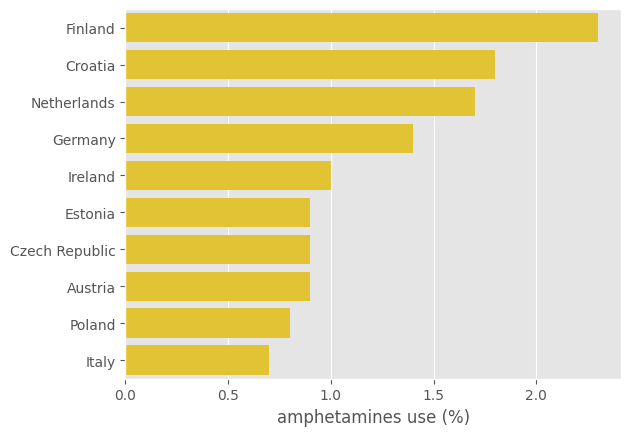

In [342]:
barplot_amphetamines=sns.barplot(y=a_act_amphetamines['values_act_amphetamines'].sort_values(ascending=False).head(10).index,x=a_act_amphetamines['values_act_amphetamines'].sort_values(ascending=False).head(10),color=color_2)
plt.xlabel('amphetamines use (%)')
plt.ylabel('')

In [343]:
print('The country with the most amphetamines consumption is',a_act_amphetamines['values_act_amphetamines'].idxmax())
print('The country with the least amphetamines consumption is',a_act_amphetamines['values_act_amphetamines'].idxmin())

The country with the most amphetamines consumption is Finland
The country with the least amphetamines consumption is Greece


Text(0, 0.5, '')

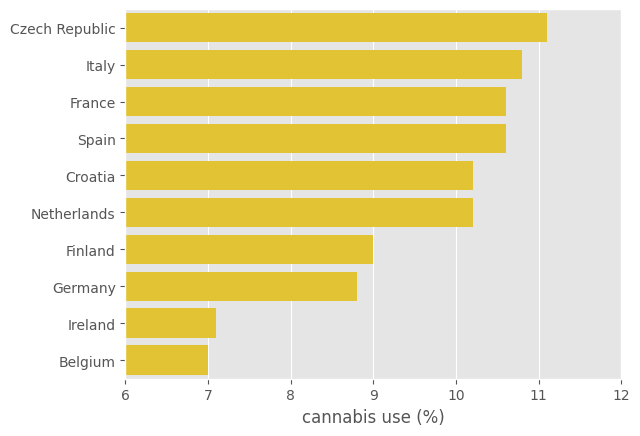

In [344]:
barplot_cannabis=sns.barplot(y=a_act_cannabis['values_act_cannabis'].sort_values(ascending=False).head(10).index,x=a_act_cannabis['values_act_cannabis'].sort_values(ascending=False).head(10),color=color_2)
plt.xlim(6,12)
plt.xlabel('cannabis use (%)')
plt.ylabel('')

In [345]:
print('The country with the most cannabis consumption is',a_act_cannabis['values_act_cannabis'].idxmax())
print('The country with the least cannabis consumption is',a_act_cannabis['values_act_cannabis'].idxmin())

The country with the most cannabis consumption is Czech Republic
The country with the least cannabis consumption is Malta


Text(0, 0.5, '')

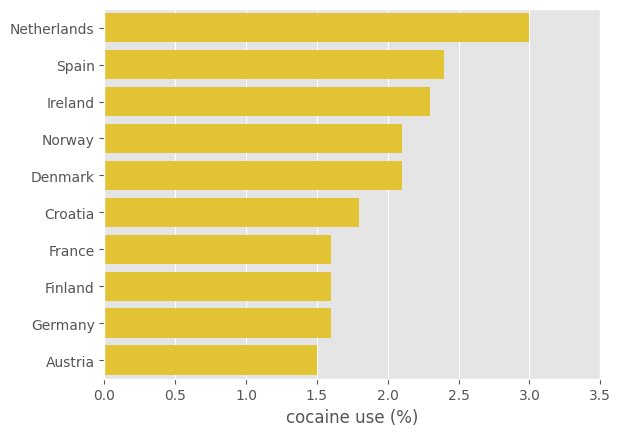

In [346]:
barplot_cocaine=sns.barplot(y=a_act_cocaine['values_act_cocaine'].sort_values(ascending=False).head(10).index,x=a_act_cocaine['values_act_cocaine'].sort_values(ascending=False).head(10),color=color_2)
plt.xlim(0,3.5)
plt.xlabel('cocaine use (%)')
plt.ylabel('')

In [347]:
print('The country with the most cocaine consumption is',a_act_cocaine['values_act_cocaine'].idxmax())
print('The country with the least cocaine consumption is',a_act_cocaine['values_act_cocaine'].idxmin())

The country with the most cocaine consumption is Netherlands
The country with the least cocaine consumption is Turkey


Text(0, 0.5, '')

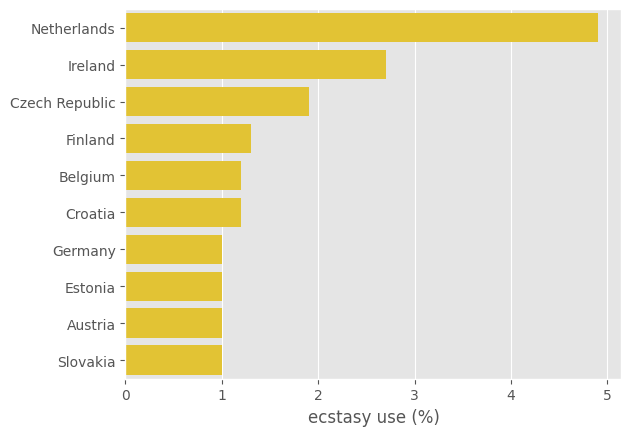

In [348]:
barplot_lsd=sns.barplot(y=a_act_ecstasy['values_act_ecstasy'].sort_values(ascending=False).head(10).index,x=a_act_ecstasy['values_act_ecstasy'].sort_values(ascending=False).head(10),color=color_2)
plt.xlabel('ecstasy use (%)')
plt.ylabel('')

In [349]:
print('The country with the most ecstasy consumption is',a_act_ecstasy['values_act_ecstasy'].idxmax())
print('The country with the least ecstasy consumption is',a_act_ecstasy['values_act_ecstasy'].idxmin())

The country with the most ecstasy consumption is Netherlands
The country with the least ecstasy consumption is Portugal


Text(0, 0.5, '')

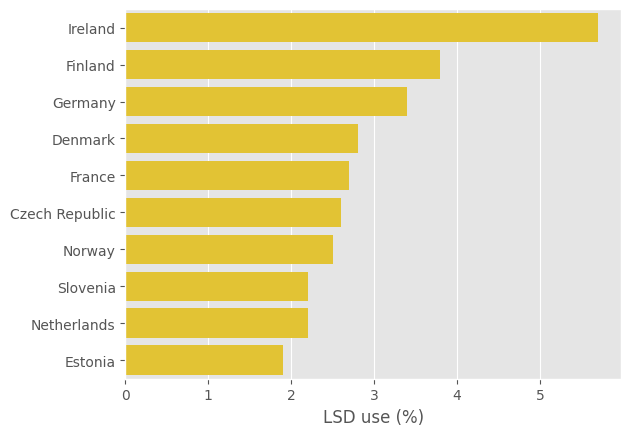

In [350]:
barplot_lsd=sns.barplot(y=a_act_lsd['values_act_lsd'].sort_values(ascending=False).head(10).index,x=a_act_lsd['values_act_lsd'].sort_values(ascending=False).head(10),color=color_2)
plt.xlabel('LSD use (%)')
plt.ylabel('')

In [351]:
print('The country with the most LSD consumption is',a_act_lsd['values_act_lsd'].idxmax())
print('The country with the least LSD consumption is',a_act_lsd['values_act_lsd'].idxmin())

The country with the most LSD consumption is Ireland
The country with the least LSD consumption is Belgium


### Is there an increase in the countries where it is legalized?

The countries with more lenient drug policies are:

* Netherlands: Cannabis is legal
* Portugal: All drugs
* Spain: Cannabis in private spaces
* Germany: Cannabis since 2023 -> no data available from that year onward (OUT)
* Czech Republic: Cannabis
* Malta: Cannabis starting from 2021 -> no data available from that year onward (OUT)
* Luxembourg: Cannabis starting from 2021 -> no data available from that year onward (OUT)

It is true that cannabis consumption stands out, rather than the consumption of other drugs. However, the rest will also be analyzed, as its use could act as a gateway to the consumption of other drugs and encourage further use.

To obtain this data, I first create a dataframe with the drug consumption of these countries, so I can later plot it. This df is df_legalized_countries

In [352]:
list_legalized_countries=['Netherlands','Portugal','Spain','Czech Republic','Mean all countries']
list_drugs=['alcohol','tobacco','amphetamines','cannabis','cocaine','ecstasy','LSD']

df_legalized_countries=pd.DataFrame(columns=list_drugs,index=list_legalized_countries) #fill of NaN



In [353]:
#We fill the DF with the corresponding values
for i in list_legalized_countries[:-1]:
    if i in a_act_alcohol.index:
        df_legalized_countries.loc[i,'alcohol']=a_act_alcohol.loc[i,'values_act_alcohol']

    if i in a_act_tobacco.index:
        df_legalized_countries.loc[i,'tobacco']=a_act_tobacco.loc[i,'values_act_tobacco']    

    if i in a_act_amphetamines.index:
        df_legalized_countries.loc[i,'amphetamines']=a_act_amphetamines.loc[i,'values_act_amphetamines']

    if i in a_act_cannabis.index:
        df_legalized_countries.loc[i,'cannabis']=a_act_cannabis.loc[i,'values_act_cannabis']
        
    if i in a_act_cocaine.index:
        df_legalized_countries.loc[i,'cocaine']=a_act_cocaine.loc[i,'values_act_cocaine']   

    if i in a_act_ecstasy.index:
        df_legalized_countries.loc[i,'ecstasy']=a_act_ecstasy.loc[i,'values_act_ecstasy']

    if i in a_act_lsd.index:
        df_legalized_countries.loc[i,'LSD']=a_act_lsd.loc[i,'values_act_lsd']

df_legalized_countries.loc['Mean all countries','alcohol']=a_act_alcohol.loc[:,'values_act_alcohol'].mean()
df_legalized_countries.loc['Mean all countries','tobacco']=a_act_tobacco.loc[:,'values_act_tobacco'].mean()
df_legalized_countries.loc['Mean all countries','amphetamines']=a_act_amphetamines.loc[:,'values_act_amphetamines'].mean()
df_legalized_countries.loc['Mean all countries','cannabis']=a_act_cannabis.loc[:,'values_act_cannabis'].mean()
df_legalized_countries.loc['Mean all countries','cocaine']=a_act_cocaine.loc[:,'values_act_cocaine'].mean()
df_legalized_countries.loc['Mean all countries','ecstasy']=a_act_ecstasy.loc[:,'values_act_ecstasy'].mean()
df_legalized_countries.loc['Mean all countries','LSD']=a_act_lsd.loc[:,'values_act_lsd'].mean()

Now, the melt function is used to create a dataframe for plotting a grouped bar chart, allowing for a comparison of these countries's values with the average:

In [354]:
df_legalized_countries['countries']=df_legalized_countries.index
df_melt_leg=df_legalized_countries.melt(id_vars=['countries'],value_vars=list_drugs)
df_melt_leg.sort_values('value',ascending=False,inplace=True)


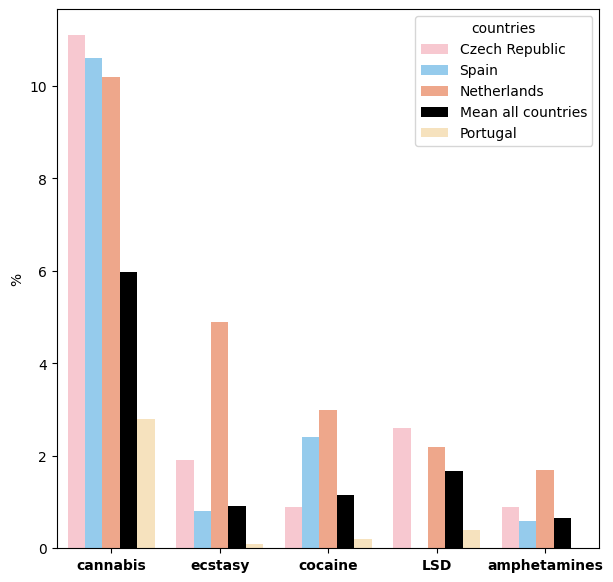

In [379]:
plt.figure(figsize=(7,7))
sns.barplot(data=df_melt_leg[(df_melt_leg['variable']!='alcohol') & (df_melt_leg['variable']!='tobacco')],x='variable',y='value',hue='countries',palette=['pink','lightskyblue','lightsalmon','black','moccasin','lightgray'])
plt.xlabel("")
plt.ylabel("%")
plt.xticks(fontweight='bold');

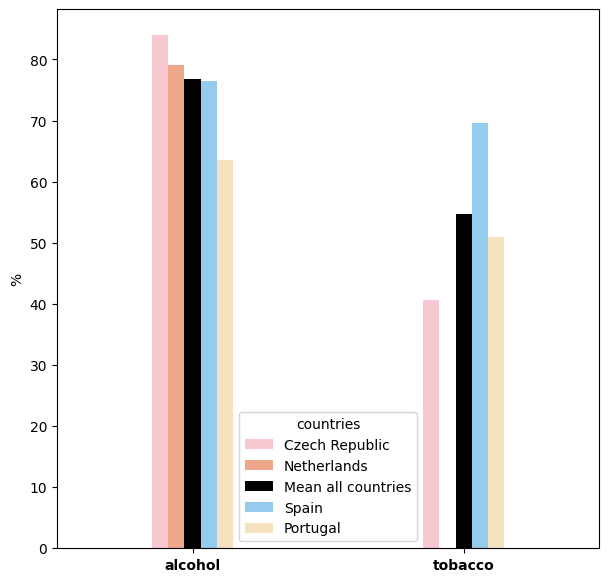

In [380]:
plt.figure(figsize=(7,7))
sns.barplot(data=df_melt_leg[(df_melt_leg['variable']=='alcohol') | (df_melt_leg['variable']=='tobacco')].sort_values('value',ascending=False),x='variable',y='value',hue='countries',palette=['pink','lightsalmon','black','lightskyblue','moccasin'],width=0.3)
plt.xlabel("")
plt.ylabel("%")
plt.xticks(fontweight='bold');

##### `ANALYSIS:`

The results indicate that there is a higher consumption of cannabis overall, except in Portugal. Regarding the consumption of other drugs, only the Netherlands stands out, with significantly higher consumption than the average for all drugs except alcohol and tobacco. The Czech Republic also stands out in the consumption of ecstasy and LSD, being the top cannabis-consuming country.

It is true that, observing the previous section, we also see other countries with high consumption and more restrictive policies. Therefore, even though there is a slight correlation, it might not be significant, and other factors may influence this, which would require deeper investigation.

### Evaluation of consumption based on the Gini coefficient:

The Gini coefficient is defined as the relationship of cumulative shares of the population arranged according to the level of equivalised disposable income, to the cumulative share of the equivalised total disposable income received by them.


In [357]:
#df_gini=pd.read_excel('.\\Own_projet\\GINI.xlsx',sheet_name='Sheet 1',skiprows=8).replace('Türkiye','Turkey').replace(':',np.nan).replace('Czechia','Czech Republic')
df_gini=df_gini.iloc[int(df_gini.index[df_gini['TIME']=='Belgium'][0]):int(df_gini.index[df_gini['TIME']=='Turkey'][0]+1):1,::]
df_gini=df_gini.loc[:,['TIME','2023']]
df_gini=df_gini.set_index('TIME')

In [358]:
corr_list_gini=list([])

#### ALCOHOL

In the first case with alcohol, we will consider Turkey:

[[ 1.         -0.56957889]
 [-0.56957889  1.        ]]


<Axes: xlabel='GINI', ylabel='alcohol %'>

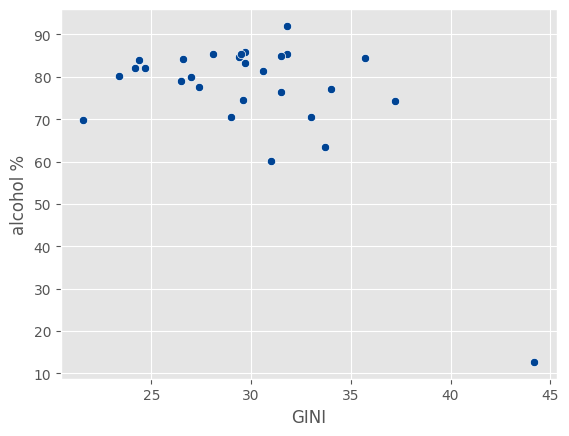

In [359]:
t=a_act_alcohol['values_act_alcohol']#.drop('Turkey')
h=df_gini.loc[a_act_alcohol.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='alcohol %')
fig

#### TOBACCO

[[1.         0.21062719]
 [0.21062719 1.        ]]


<Axes: xlabel='GINI', ylabel='tobacco %'>

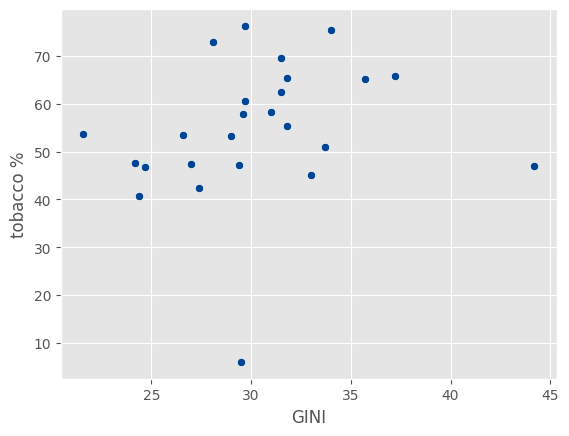

In [360]:
t=a_act_tobacco['values_act_tobacco']
h=df_gini.loc[a_act_tobacco.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='tobacco %')
fig



#### AMPHETAMINES

[[ 1.         -0.21622167]
 [-0.21622167  1.        ]]


<Axes: xlabel='GINI', ylabel='amphetamines %'>

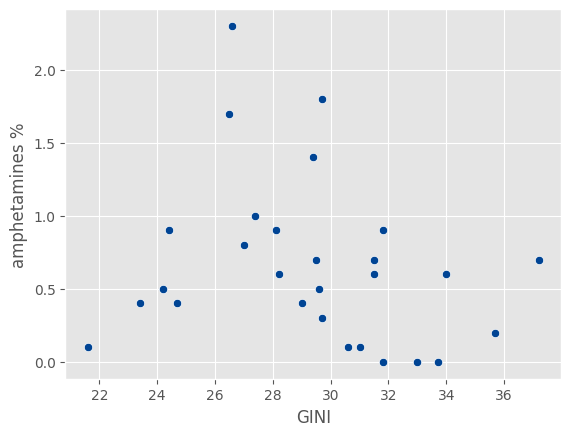

In [361]:
t=a_act_amphetamines['values_act_amphetamines']
h=df_gini.loc[a_act_amphetamines.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='amphetamines %')
fig


#### CANNABIS

[[ 1.        -0.4461759]
 [-0.4461759  1.       ]]


<Axes: xlabel='GINI', ylabel='cannabis %'>

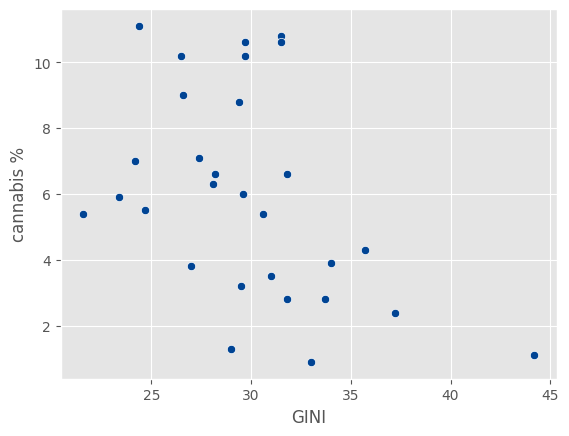

In [362]:
t=a_act_cannabis['values_act_cannabis']
h=df_gini.loc[a_act_cannabis.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='cannabis %')
fig


#### COCAINE

[[ 1.        -0.3618771]
 [-0.3618771  1.       ]]


<Axes: xlabel='GINI', ylabel='cocaine %'>

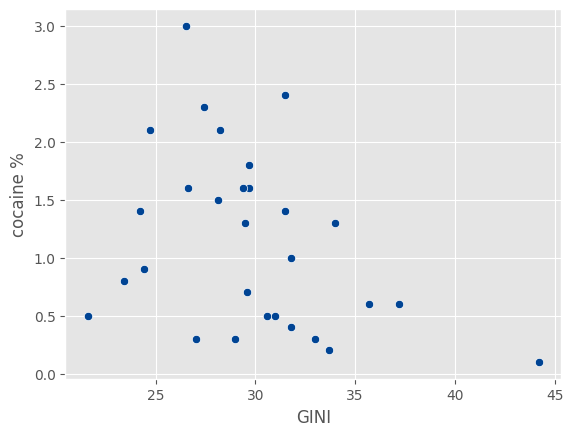

In [363]:
t=a_act_cocaine['values_act_cocaine']
h=df_gini.loc[a_act_cocaine.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='cocaine %')
fig

#### ECSTASY

[[ 1.        -0.4001091]
 [-0.4001091  1.       ]]


<Axes: xlabel='GINI', ylabel='ecstasy %'>

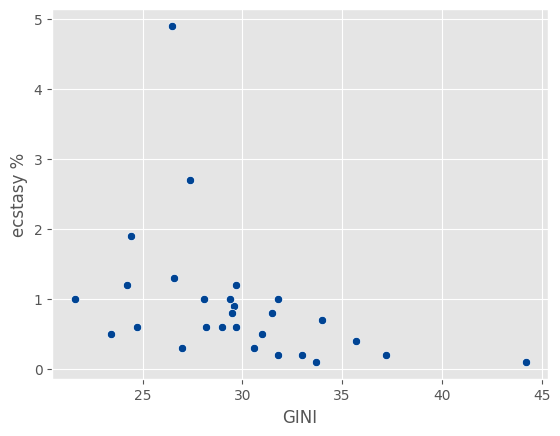

In [364]:
t=a_act_ecstasy['values_act_ecstasy']
h=df_gini.loc[a_act_ecstasy.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='ecstasy %')
fig


#### LSD

[[ 1.         -0.45202585]
 [-0.45202585  1.        ]]


<Axes: xlabel='GINI', ylabel='LSD %'>

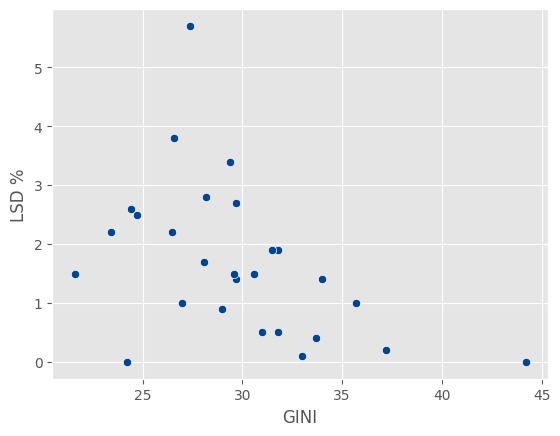

In [365]:
t=a_act_lsd['values_act_lsd']
h=df_gini.loc[a_act_lsd.index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
corr_list_gini.append(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='LSD %')
fig

Then the values of the correlation with the Gini coefficient are:

In [366]:
df_corr_gini=pd.DataFrame({'Correlation value': corr_list_gini},index=['alcohol','tobacco','amphetamines','cannabis','cocaine','ecstasy','LSD'])
df_corr_gini

,Correlation value
alcohol,-0.569579
tobacco,0.210627
amphetamines,-0.216222
cannabis,-0.446176
cocaine,-0.361877
ecstasy,-0.400109
LSD,-0.452026


Now we will consider Turkey as an outlier in the case of the alcohol:

[[ 1.         -0.12252852]
 [-0.12252852  1.        ]]


<Axes: xlabel='GINI', ylabel='alcohol %'>

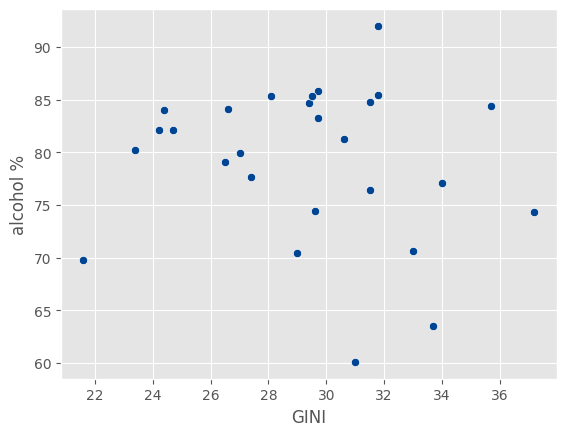

In [367]:
t=a_act_alcohol['values_act_alcohol'].drop('Turkey')
h=df_gini.loc[a_act_alcohol[:'Sweden'].index]

print(np.corrcoef(h.values.reshape(len(h)),t.values))
df_corr_gini.loc['alcohol','Correlation value']=(np.corrcoef(h.values.reshape(len(h)),t.values)[1][0])
fig=sns.scatterplot(x = h.values.reshape(len(h)), y = t.values,color=color_1);
fig.set(xlabel='GINI',ylabel='alcohol %')
fig

And the new values are:

In [368]:
df_corr_gini

,Correlation value
alcohol,-0.122529
tobacco,0.210627
amphetamines,-0.216222
cannabis,-0.446176
cocaine,-0.361877
ecstasy,-0.400109
LSD,-0.452026


##### `ANALYSIS:`

In the results obtained from the correlations of current drug use levels, it can be observed that there is no very significant correlation, except in the case of alcohol, which does exceed a value of -0.5. Nevertheless, both for alcohol and for other substances with lower correlations, a negative correlation can be observed. This indicates that countries with a lower Gini coefficient(those with lower levels of inequality), tend to have higher consumption rates.

In the case where Turkey is not considered for alcohol consumption, this correlation becomes insignificant, so it could be said that there is none.

### Representation of values on maps of Europe

In this final step, for better data visualization, the values reflecting the trend in the consumption of each drug in the different countries studied will be represented on a map of Europe, accompanied by a graph showing the data for the countries with the highest consumption of that substance. The trend will be shown with the data obtained from the covariance computed previously.

The countries where no data is shown are either because there was no data (NaN), there was only one data point so the trend couldn’t be calculated, or because their trend was 0, making it insignificant to display.

In [369]:
plt.style.use('default')

#### ALCOHOL

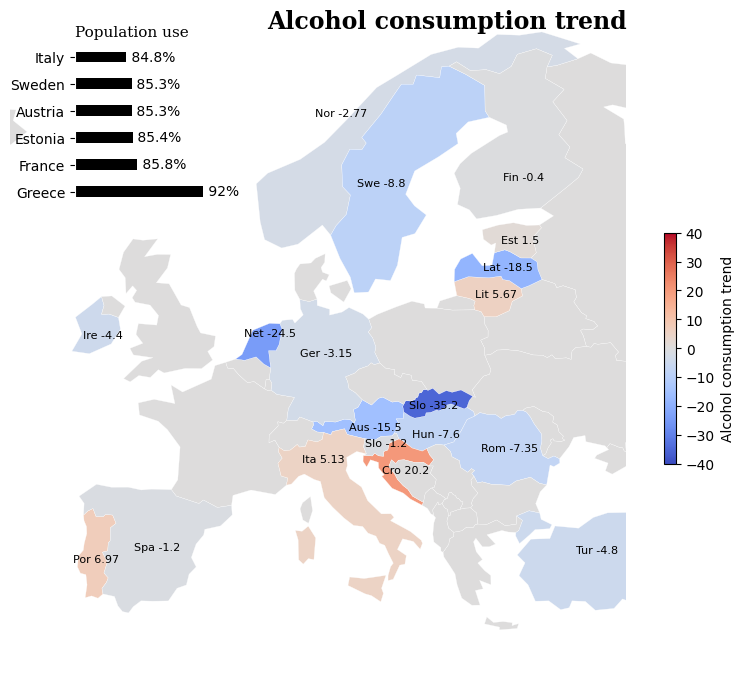

In [370]:
""" 
Df created from the covariance data
"""

data_europe_alcohol=pd.DataFrame(data=a_alcohol,index=df_alcohol.index)

#A replace for Czech Republic, as it appears that way in the file used.
data_europe_alcohol.index=data_europe_alcohol.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_alcohol)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')
#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -40, 40
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("Alcohol consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.34, 0.9, 'Alcohol consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')


#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_alcohol['values_act_alcohol'].sort_values(ascending=False).head(6).index,a_act_alcohol['values_act_alcohol'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(80,95)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')


# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

#### TOBACCO

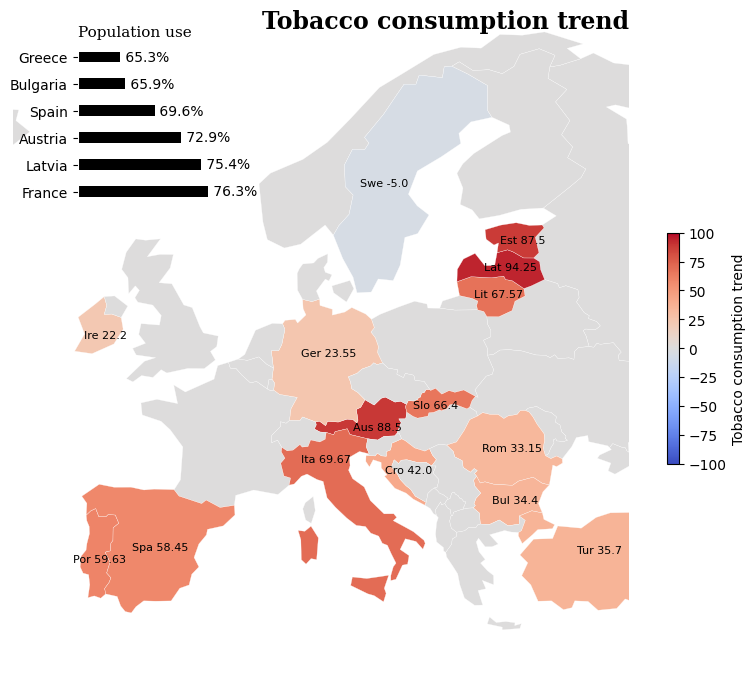

In [371]:
""" 
Df created from the covariance data
"""

data_europe_tobacco=pd.DataFrame(data=a_tobacco,index=df_tobacco.index)

data_europe_tobacco.index=data_europe_tobacco.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_tobacco)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')
#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -100, 100
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("Tobacco consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.33, 0.9, 'Tobacco consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')

#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_tobacco['values_act_tobacco'].sort_values(ascending=False).head(6).index,a_act_tobacco['values_act_tobacco'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(60,80)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')


# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

#### AMPHETAMINES

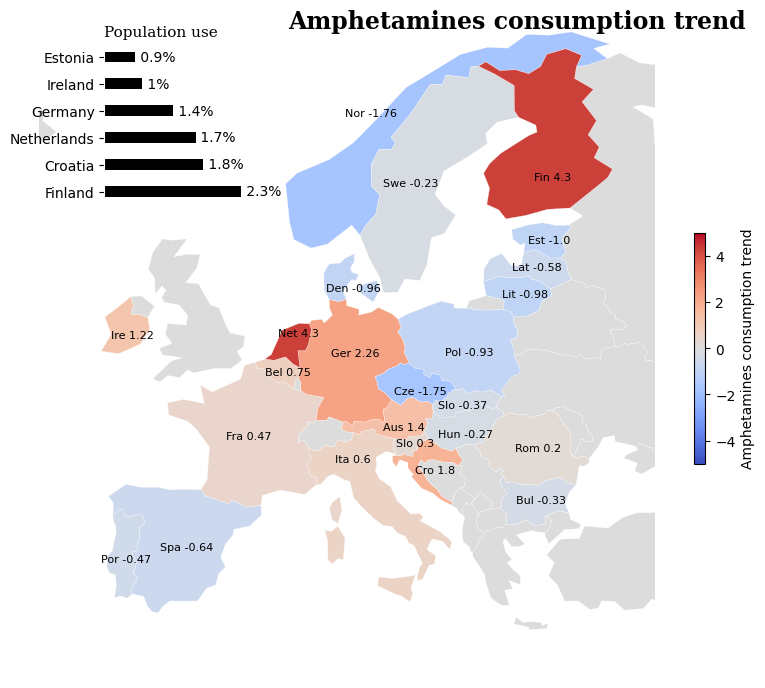

In [372]:
""" 
Df created from the covariance data
"""

data_europe_amphetamines=pd.DataFrame(data=a_amphetamines,index=df_amphetamines.index)

data_europe_amphetamines.index=data_europe_amphetamines.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_amphetamines)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')

#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -5, 5
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("Amphetamines consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.33, 0.9, 'Amphetamines consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')

#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_amphetamines['values_act_amphetamines'].sort_values(ascending=False).head(6).index,a_act_amphetamines['values_act_amphetamines'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(0.5,2.6)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

#### CANNABIS

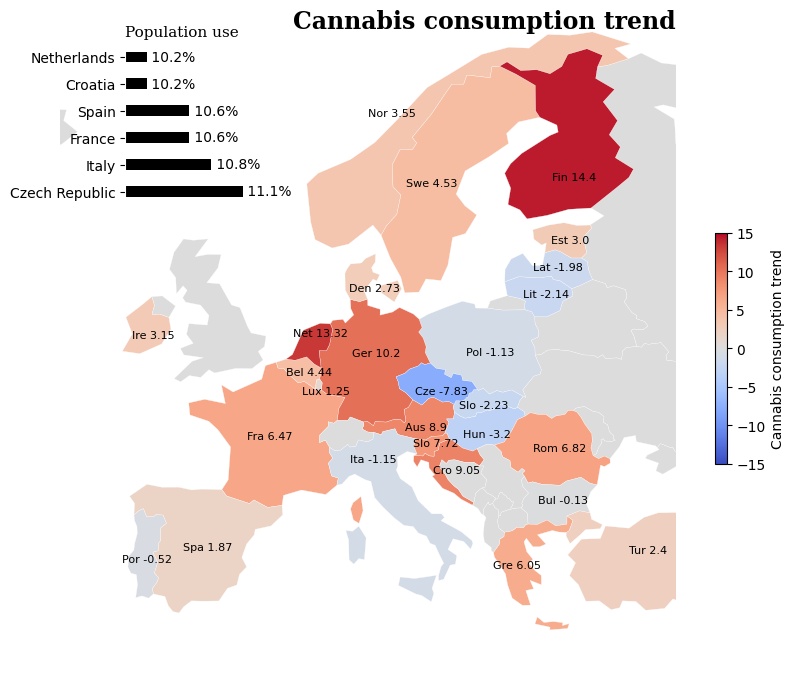

In [373]:
""" 
Df created from the covariance data
"""

data_europe_cannabis=pd.DataFrame(data=a_cannabis,index=df_cannabis.index)

data_europe_cannabis.index=data_europe_cannabis.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_cannabis)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')

#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -15, 15
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("Cannabis consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.31, 0.9, 'Cannabis consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')

#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_cannabis['values_act_cannabis'].sort_values(ascending=False).head(6).index,a_act_cannabis['values_act_cannabis'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(10,11.5)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

#### COCAINE

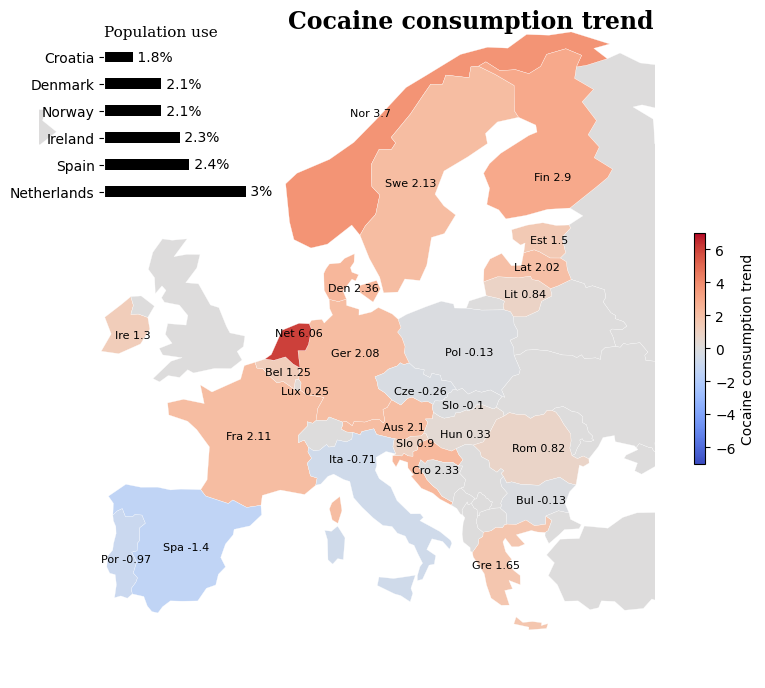

In [374]:
""" 
Df created from the covariance data
"""

data_europe_cocaine=pd.DataFrame(data=a_cocaine,index=df_cocaine.index)

data_europe_cocaine.index=data_europe_cocaine.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_cocaine)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')

#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -7, 7
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("Cocaine consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.33, 0.9, 'Cocaine consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')

#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_cocaine['values_act_cocaine'].sort_values(ascending=False).head(6).index,a_act_cocaine['values_act_cocaine'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(1.5,3.2)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

#### ECSTASY

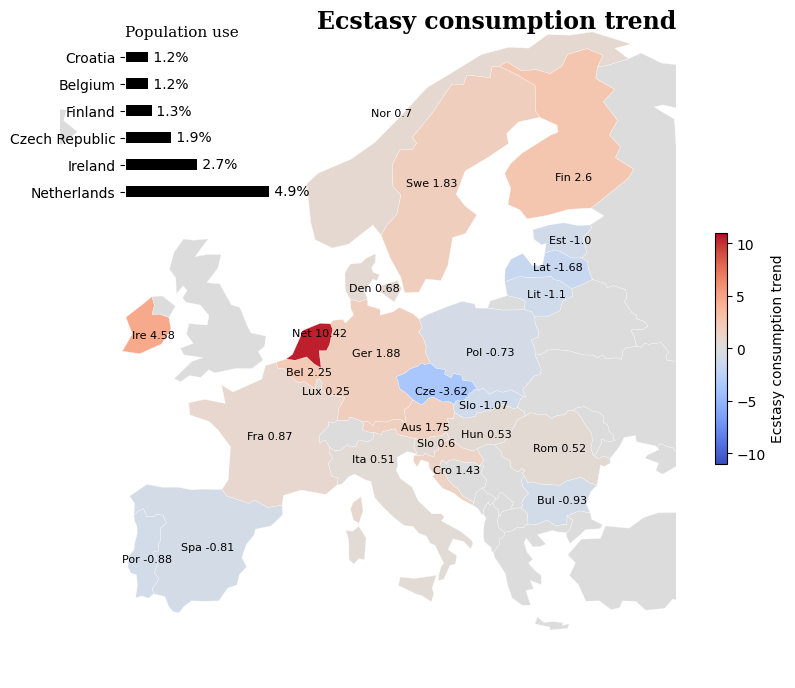

In [375]:
""" 
Df created from the covariance data
"""

data_europe_ecstasy=pd.DataFrame(data=a_ecstasy,index=df_ecstasy.index)

data_europe_ecstasy.index=data_europe_ecstasy.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_ecstasy)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')

#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -11, 11
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("Ecstasy consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.34, 0.9, 'Ecstasy consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')

#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_ecstasy['values_act_ecstasy'].sort_values(ascending=False).head(6).index,a_act_ecstasy['values_act_ecstasy'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(0.5,5.4)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

#### LSD

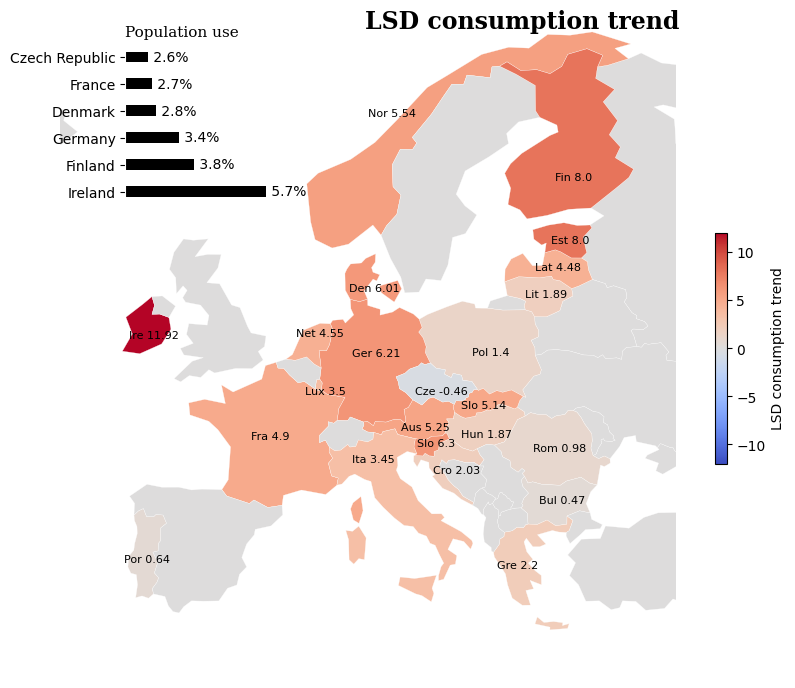

In [376]:
""" 
Df created from the covariance data
"""

data_europe_lsd=pd.DataFrame(data=a_lsd,index=df_lsd.index)

data_europe_lsd.index=data_europe_lsd.index.str.replace('Czech Republic', 'Czechia')
gdf=gpd.GeoDataFrame(data_europe_lsd)

""" 
We read the world map using the GeoPandas library and filter for Europe and Turkey
"""

# world map
world = gpd.read_file(
    ".\\Own_projet\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[(world['CONTINENT'] == 'Europe') | (world['ADMIN'] == 'Turkey')]

#A merge of the tables to combine the data and be able to represent it.
data = europe.merge(gdf, how='left',
                    left_on='NAME', right_on='Country')

#To display the countries with NaN values on the map, I will set them to 0. It's a bit of a manipulation of the tables, 
#but since I'm only interested in showing the most notable values, it serves as a method.
data.loc[data[0][pd.isna(data[0])].index,0]=0
data[0] = round(data[0], 2)

""" 
To plot the map
"""

# initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# define colors
cmap = cm.coolwarm
min_rate, max_rate = -12, 12
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# create the plot
data.plot(column=0, cmap=cmap, norm=norm,edgecolor='white', linewidth=0.2, ax=ax)

# Personalize the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_rate, vmax=max_rate))
sm._A = []  # Necessary to avoid errors
cbar = fig.colorbar(sm, ax=ax, shrink=0.3)
cbar.set_label("LSD consumption trend")

# custom axis
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.axis('off')

# add a title
fig.text(0.4, 0.9, 'LSD consumption trend',
         fontsize=17, fontweight='bold', fontfamily='serif')

# add a second title
fig.text(0.1, 0.89, 'Population use',
         fontsize=11, fontweight='normal', fontfamily='serif')

#insert the bar graphic
ax2 = fig.add_axes([0.1, 0.68, 0.2, 0.2])
ax2.barh(a_act_lsd['values_act_lsd'].sort_values(ascending=False).head(6).index,a_act_lsd['values_act_lsd'].sort_values(ascending=False).head(6),color='black',height=0.4)
plt.xlim(2,6.2)
plt.ylabel('')
plt.xticks([])

ax2.spines['left'].set_color('white')        # setting axis tick color to white
ax2.spines['top'].set_color('white') 
ax2.spines['right'].set_color('white')        
ax2.spines['bottom'].set_color('white')  

# add a label to the bar graphic
for i in ax2.containers:
    ax2.bar_label(i,padding=0.5,fmt=' %g%%')

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
#filter the countries to put those with values greater or less than 0
countries_to_annotate = data['ADMIN'][data[0]!=0]

adjustments = {
    'France': (9, 3),
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -0.5),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Norway': (-1.5, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
    'Turkey': (-3, 0),
    'Russia': (0, 0),
    'Belarus': (0, 0),
    'Ukraine': (0, 0),
    'Moldova': (0, 0),
    'Albania': (0, 0),
    'Iceland': (0, 0),

}
# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = data.loc[data['NAME'] == country, 0].values[0]
    ax.annotate(f'{country[:3]} {rate}',(x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')

# display the plot
plt.tight_layout()
plt.show()

##### `ANALYSIS:`

- `Alcohol:`

Although information is missing for several countries, a decrease in consumption is observed in most of them, with a very favorable trend in Slovenia and the Netherlands. On the other hand, Croatia has experienced a significant increase.

- `Tobacco:`

It is the scenario with the worst trend, as consumption increases significantly in almost all countries.

- `Amphetamines:`

It is observed that there is no clear trend globally, although in the countries where a significant increase has occurred are the Netherlands and Finland.

- `Cannabis:`

Except for Czechia, it can be observed that there is a significant increase in many countries, specifically in the Netherlands, Finland, and Germany.

- `Cocaine:`

A significant increase is observed in most countries, especially in the Netherlands, and there is also a noticeable reduction in Spain, which was the second country with the highest consumption.

- `Ecstasy:`

A greater upward trend can be observed, especially in countries like the Netherlands and Ireland, although there are decreases in some countries like the Czech Republic.

- `LSD:`

The trend observed in almost all countries is an increase, with a particularly significant value in Ireland.


## Final conclusion

The conclusions drawn from this EDA are that after conducting numerous awareness and drug control campaigns by various European countries, they are as follows:  

* `At the gender level:`    
On one hand, the male gender shows significantly higher consumption than the female gender across all drugs.

* `Observed trend:`   
The only case where a more significant overall decrease has been observed is in alcohol consumption. However, for the rest of the drugs, an increase has been noted, particularly in tobacco. The most concerning case is the Netherlands, where drug consumption exceeds the average for all substances (except tobacco, where data was unavailable), although there is a decrease in alcohol consumption, a significant increase is observed in the use of other drugs. 

* `Countries with decriminalization:`  
Based on the observed results, it can be said that there seems to be a relationship between higher consumption levels in countries where certain substances are decriminalized (specifically cannabis, which may act as a gateway to the use of other drugs). However, it is also true that some countries with stricter policies also have high consumption rates, suggesting that a deeper analysis is necessary to confirm this relationship with certainty.

* `With the Gini coefficient:`  
Finally, it can also be concluded that in countries with a lower Gini coefficient, meaning those with lower inequalities and generally considered to be 'more developed,' there appears to be a slightly higher level of consumption compared to countries with a higher Gini coefficient.

**Possible improvements:**  
It is true that the information used contained many missing values, and having fewer missing values could have promoted more accurate data reflecting reality. Additionally, increasing the sample size could better represent the population of each country. However, it is not easy to collect such data in the most reliable way, especially on such a sensitive topic. Anyway, the data obtained by the EUDA is reliable, and usable results have been achieved to study the current situation of society in different countries today.